In [4]:
!pip install dotmap
import json
import ast
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.animation as animation
import numpy as np
from dotmap import DotMap
from random import *
import pandas as pd
from IPython.display import HTML
import imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Policy Iteration

with open("/content/PolicyIteration - Discount-0.95, THETA-0.01, P-0.0.json", "r") as openfile:
    policy = json.load(openfile)
    P = 0.02
openfile.close()

# with open("/content/PolicyIteration - Discount-0.5, THETA-0.01, P-0.02.json", "r") as openfile:
#     policy = json.load(openfile)
#     P = 0
# openfile.close()

# with open("/content/PolicyIteration - Discount-0.95, THETA-0.01, P-0.02.json", "r") as openfile:
#     policy = json.load(openfile)
#     P = 0.02
# openfile.close()

# with open("/content/PolicyIteration - Discount-0.95, THETA-0.01, P-0.5.json", "r") as openfile:
#     policy = json.load(openfile)
#     P = 0.5
# openfile.close()


# Value Iteration

# with open("/content/ValueIteration - Discount-0.95, THETA-0.01, P-0.02.json", "r") as openfile:
#     policy = json.load(openfile)
#     P = 0.02
# openfile.close()

# with open("/content/ValueIteration - Discount-0.95, THETA-0.01, P-0.5.json", "r") as openfile:
#     policy = json.load(openfile)
#     P = 0.5
# openfile.close()

# with open("/content/ValueIteration - Discount-0.55, THETA-0.01, P-0.02.json", "r") as openfile:
#     policy = json.load(openfile)
#     P = 0.02
# openfile.close()

# with open("/content/ValueIteration - Discount-0.9, THETA-0.01, P-0.0.json", "r") as openfile:
#     policy = json.load(openfile)
#     P = 0
# openfile.close()

policy = ast.literal_eval(policy)
my_policy, value_graph = policy[0], policy[1]

my_policy = np.pad(my_policy, pad_width=1, mode='constant', constant_values=1)
value_graph = np.pad(value_graph, pad_width=1, mode='constant', constant_values=1)

print(my_policy)
value_graph

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 2 2 2 2 0 3 3 3 3 3 3 3 0 1 1 1 1 1 1]
 [1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1]
 [1 2 2 0 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 1]
 [1 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 1 1]
 [1 2 2 0 2 2 0 2 2 0 2 2 0 0 0 0 2 2 1 1]
 [1 2 2 1 1 2 0 2 2 0 2 2 1 1 1 0 2 2 1 1]
 [1 2 2 1 1 2 0 2 2 0 2 2 1 1 1 0 2 2 1 1]
 [1 0 0 0 0 2 0 2 2 0 0 2 1 1 1 0 2 2 1 1]
 [1 3 3 3 3 2 0 2 2 1 0 2 1 0 2 0 0 0 2 1]
 [1 2 2 0 0 0 0 0 2 1 0 2 1 0 0 0 0 0 2 1]
 [1 2 2 1 1 0 0 0 2 1 0 2 1 0 0 0 0 0 2 1]
 [1 2 2 1 0 0 0 0 2 0 0 2 1 0 3 3 3 3 2 1]
 [1 2 2 0 0 0 0 0 2 3 3 2 1 0 0 0 0 2 2 1]
 [1 2 2 3 3 3 3 3 2 2 2 2 1 3 3 3 3 2 2 1]
 [1 0 0 2 2 2 2 0 0 0 0 0 0 2 2 2 2 2 2 1]
 [1 3 3 2 2 2 2 1 3 3 3 3 3 2 2 2 2 2 2 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


array([['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
        '1', '1', '1', '1', '1', '1', '1'],
       ['1', '87.2884954054', '92.9352583215', '98.8792192858',
        '105.1360203008', '111.7221266324', '118.6548701394',
        '125.9524948836', '133.6342051406', '141.7202159375',
        '150.23180625', '159.191375', '168.6225', '178.55', '168.6225',
        '159.191375', '150.23180625', '141.7202159375', '133.6342051406',
        '1'],
       ['1', '81.9240706351', '87.2884954054', '92.9352583215',
        '98.8792192858', 'WALL', '125.9524948836', '133.6342051406',
        '141.7202159375', '150.23180625', '159.191375', '168.6225',
        '178.55', '189.0', '178.55', '168.6225', '159.191375',
        '150.23180625', '141.7202159375', '1'],
       ['1', '76.8278671033', '81.9240706351', '87.2884954054',
        '92.9352583215', 'WALL', '133.6342051406', '141.7202159375',
        '150.23180625', '159.191375', '168.6225', '178.55', '189.0',
        '200', '189.0

In [6]:
ACTIONS = ["D", "L", "U", "R"]

In [7]:
# Free Space: 0, Wall: 1, Bump: 2, Oil: 3, Start: 4, End: 5

default_map = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0], 
                [2, 2, 2, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0], 
                [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0], 
                [0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], 
                [2, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0], 
                [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0],
                [0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0], 
                [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0], 
                [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], 
                [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0], 
                [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0], 
                [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], 
                [2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], 
                [0, 0, 0, 4, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 2, 2],
                [0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0], 
                [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 3, 0], 
                [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],], np.int32)

class Environment():

  def __init__(self,map): # initializtion
    self.map = map
    self.closed_map = np.pad(map, pad_width=1, mode='constant', constant_values=1)
    self.reward = DotMap()
    self.maze = DotMap()
    self.maze.Wall = 1
    self.maze.Bump = 2
    self.maze.Oil = 3
    self.maze.Start = 4
    self.maze.End = 5
    self.reward.move = -1
    self.reward.oil = -5
    self.reward.bump = -10
    self.reward.goal = 200
    self.action_list = np.array(['U', 'D', 'L', 'R'])
    self.start_pos = self.find_start_pos()
    self.end_pos = self.find_end_pos()
    self.current_pos = np.copy(self.start_pos)
    self.current_state = self.maze.Start
    self.total_reward = 0
    self.step = 0
    self.STEP_LIMIT = 500
    self.TOTAL_RUN = 100
    self.current_run = 0
    self.final_reward_list =np.zeros(self.TOTAL_RUN)
    self.p = 1-P


  def policy(self, current_pos):
    return ACTIONS[int(my_policy[self.current_pos[0], self.current_pos[1]])]

  def move(self,action):
    
    if action == 'U' and self.closed_map[self.current_pos[0]-1, self.current_pos[1]] != self.maze.Wall:
      self.current_pos[0] = self.current_pos[0] - 1
    elif action == 'D' and self.closed_map[self.current_pos[0]+1, self.current_pos[1]] != self.maze.Wall:
      self.current_pos[0] = self.current_pos[0] + 1
    elif action == 'R' and self.closed_map[self.current_pos[0], self.current_pos[1]+1] != self.maze.Wall:
      self.current_pos[1] = self.current_pos[1] + 1
    elif action == 'L' and self.closed_map[self.current_pos[0], self.current_pos[1]-1] != self.maze.Wall:
      self.current_pos[1] = self.current_pos[1] - 1
    else:
      return self.reward.move

    reward = self.reward.move
    
    self.current_state = self.closed_map[self.current_pos[0],self.current_pos[1]]

    if self.current_state == self.maze.Oil:
      reward += self.reward.oil
    elif self.current_state == self.maze.Bump:
      reward += self.reward.bump
    elif self.current_state == self.maze.End:
      reward += self.reward.goal
    return reward

  def action(self):
    selected_action = self.policy(self.current_pos)
    if uniform(0,1) > self.p:
      temp_list = np.delete(self.action_list, np.where(self.action_list == selected_action)[0][0], None)
      selected_action = choice(temp_list)
    self.total_reward += self.move(selected_action)
    self.step += 1

  def execute(self):
    while((self.current_state != self.maze.End) and self.step < self.STEP_LIMIT):
      self.action()
  
  def run(self, p = 0.8, total_run = 100):
    self.p = p
    self.current_run = 0
    self.TOTAL_RUN = total_run
    self.final_reward_list =np.zeros(self.TOTAL_RUN)
    while(self.current_run < self.TOTAL_RUN):
      self.reset()
      self.execute()
      self.final_reward_list[self.current_run] = self.total_reward
      self.current_run += 1 


  def find_start_pos(self): 
    if np.array(np.where(self.closed_map == self.maze.Start)).shape[1] == 1:
      return np.array((np.where(self.closed_map == self.maze.Start)[0][0], np.where(self.closed_map == self.maze.Start)[1][0]))
    elif np.array(np.where(self.closed_map == self.maze.Start)).shape[1] == 0:
      print('There is no start point')
    else:
      print('Start point must be unique')

  def find_end_pos(self): 
    if np.array(np.where(self.closed_map == self.maze.End)).shape[1] == 1:
      return np.array((np.where(self.closed_map == self.maze.End)[0][0], np.where(self.closed_map == self.maze.End)[1][0]))
    elif np.array(np.where(self.closed_map == self.maze.End)).shape[1] == 0:
      print('There is no end point')
    else:
      print('End point must be unique')

  def reset(self):
    self.current_pos = np.copy(self.start_pos)
    self.current_state = self.maze.Start
    self.total_reward = 0
    self.step = 0

  def visualize_map(self, annot='policy', figsize=(10,10)):
    cmap = colors.ListedColormap(['white','black','navajowhite','firebrick', 'cornflowerblue','yellowgreen'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    fig, ax = plt.subplots(figsize=figsize)
    map_plot = ax.imshow(self.closed_map, cmap=cmap, norm=norm)
    cbar = plt.colorbar(map_plot,ticks = np.arange(0.5, 7),aspect = 7,fraction=0.05)
    cbar.set_ticklabels(['Free Space','Wall','Bump','Oil', 'Start','End', ''])
    ax.scatter([self.current_pos[1]], [self.current_pos[0]], s=50, marker='*', color='black', zorder=3)
    ax.legend(['Current Position'],bbox_to_anchor=(1.60, 0.93))
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    
    if annot == 'values':
      for r in range(len(my_policy)):
        for c in range(len(my_policy[0])):
          if value_graph[c, r] == "WALL" or value_graph[c, r] == "": continue
          ax.text(r, c, round(float(value_graph[c, r]), 1), horizontalalignment='center', verticalalignment='center', size='small',)
    elif annot == 'policy':
      for r in range(len(my_policy)):
        for c in range(len(my_policy[0])):
          if my_policy[c, r] == "WALL" or my_policy[c, r] == "": continue
          ax.text(r, c, [".", "<-", "^", "->"][int(my_policy[c, r])], horizontalalignment='center', verticalalignment='center', size='small',)

    ax.set_xticks(np.arange(-0.5, len(self.closed_map[0])));
    ax.set_yticks(np.arange(-0.5, len(self.closed_map)));
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    fig.suptitle('Current Map', fontsize=16, ha ='center', x = 0.7)
    plt.show()
    return fig

  def visualize_map_video(self, annot='policy', figsize=(10,10)):
    cmap = colors.ListedColormap(['white','black','navajowhite','firebrick', 'cornflowerblue','yellowgreen'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    fig, ax = plt.subplots()
    map_plot = ax.imshow(self.closed_map, cmap=cmap, norm=norm)
    cbar = plt.colorbar(map_plot,ticks = np.arange(0.5, 7),aspect = 7,fraction=0.05)
    cbar.set_ticklabels(['Free Space','Wall','Bump','Oil', 'Start','End', ''])
    ax.scatter([self.current_pos[1]], [self.current_pos[0]], s=50, marker='*', color='black', zorder=3)
    ax.legend(['Current Position'],bbox_to_anchor=(1.60, 0.93))
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    
    if annot == 'values':
      for r in range(len(my_policy)):
        for c in range(len(my_policy[0])):
          if my_policy[c, r] == "WALL" or my_policy[c, r] == "": continue
          val = float(my_policy[c, r])
          ax.text(r, c, round(float(my_policy[c, r]), 1), horizontalalignment='center', verticalalignment='center', size='small',)
    elif annot == 'policy':
      for r in range(len(my_policy)):
        for c in range(len(my_policy[0])):
          if my_policy[c, r] == "WALL" or my_policy[c, r] == "": continue
          ax.text(r, c, [".", "<-", "^", "->"][int(my_policy[c, r])], horizontalalignment='center', verticalalignment='center', size='small',)

    ax.set_xticks(np.arange(-0.5, len(self.closed_map[0])));
    ax.set_yticks(np.arange(-0.5, len(self.closed_map)));
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    fig.suptitle('Current Map', fontsize=16, ha ='center', x = 0.7)
    plt.show()
    return fig
  
  def run_for_different_p(self,p_list):
    for p in p_list:
      self.run(p)
      s = pd.Series(self.final_reward_list, name = 'p = ' + str(self.p))
      ax = s.plot.kde(legend = True)
    ax.set_xlabel('Total Reward')

  def plot_total_reward(self):
    s = pd.Series(self.final_reward_list, name = 'p = ' + str(self.p))
    ax = s.plot.kde(legend = True)
    ax.set_xlabel('Total Reward')

  def create_example_video(self,fps):
    frames = []
    fig = plt.figure(figsize=[5, 5])
    while((self.current_state != self.maze.End) and self.step < self.STEP_LIMIT):
      self.action()
      action_figure = self.visualize_map_video()
      image_from_plot = np.frombuffer(action_figure.canvas.tostring_rgb(), dtype=np.uint8)
      image_from_plot = image_from_plot.reshape((264,360,3))
      frames.append(image_from_plot)
      plt.close()
      mov = []
    fig = plt.figure(figsize=(5,5))
    for i in range(len(frames)): 
          img = plt.imshow(frames[i], animated=True)
          plt.axis('off')
          mov.append([img])
    animated = animation.ArtistAnimation(fig, mov, interval=int(1000/fps), repeat = False)
    return animated

  

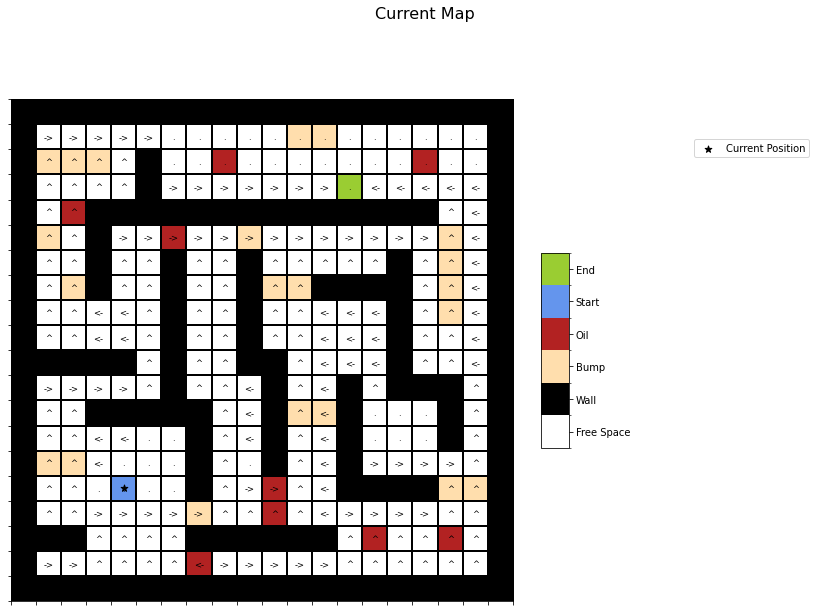

In [8]:
environment = Environment(default_map)
initial_map = environment.visualize_map(annot='policy')

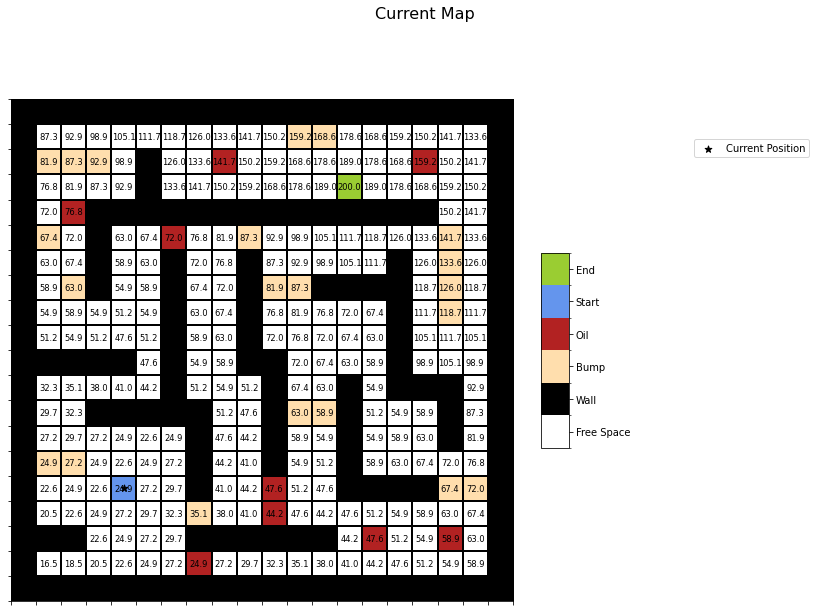

In [9]:
initial_map = environment.visualize_map(annot='values')

In [10]:
map = deepcopy(environment.map)

In [11]:
%%capture
FPS = 10
movement_animation = environment.create_example_video(FPS)

In [12]:
HTML(movement_animation.to_html5_video())  